# Assignment 1
### Kristoffer Wessling, krae21@student.bth.se, DVAMI21h
### Tobias Mattsson, tomt21@student.bth.se, DVAMI21h

### Imports

In [127]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as mpl
import numpy as np
import scipy.stats as st
import calendar
from sklearn.mixture import GaussianMixture

In [171]:
smhidf = pd.read_csv("SMHI_Dataset\SMHI_Dataset\SMHI_Data.csv", sep=",")

# Q1:
### Question:
#### Explain the data cleaning steps you consider for analyzing the provided dataset. You must motivate and describe why, how, and in which order you are going to apply the selected steps to the dataset.
### Answer:
The first step in cleaning this dataset is to remove irrelevant data. Irrelevant data is data which is no use for our analysis. For example, if it would be a column of who made the measurements it would be irrelevant for our questions. This column would therefore be removed. But in our case, we have only a few readings on a single day in 2023 which is no use for us, and it will therefore be removed. 
The second step in cleaning this data is to remove all the duplicates. The reason the duplicates are removed is because they will negatively affect any data analysis of the dataset by making the result misleading. This is due to a higher frequency of for example temperature which could for example bring up the mean value.

The third step in the data cleaning process is to detect outliers in the data.  To do this we would use the IRQ (inter quantile range) method which is described furtherly in Q8. 
After this step the timestamps intervals are checked to make sure they follow the same pattern with one hour each. This is done visually by using the function unique() where an outlier should easily be shown due to the span of interval is from 00:00 – 23:00 which mean there are only 24 values to look for.   

Then it’s time to make sure that all the columns are consistent in their defined type and name. That date are defined as XXXX-MM-DD and time stamp as HH:00:00. In this step the datatype function is used to go through the dates to make them a time object. This makes sure they are written in a specific and consistent way, and it makes it easier to handle the data later in the process cause it’s a time object with simple to get properties. It’s also examined that all the columns are spelled correctly and following a consistent theme with a capital letter in the beginning of name.

The last step becomes to handle the missing values which in this case are temperature loss. To do this the roller function is used to fill in the missing value with the mean of its surrounding 2 values, one before and one after. This will make sure the new value is linearly estimated. If there are any big chunks of data loss, we can’t replicate a pattern and may therefore have to delete some sections totally, depending on the data analysis.


### Code:

In [172]:
smhidf = smhidf.drop_duplicates() #Drops all duplicates
smhidf['Datum'] = pd.to_datetime(smhidf['Datum']) #Converts the date to datetime
smhidf['Tid (UTC)'] = pd.to_datetime(smhidf["Tid (UTC)"]).dt.strftime('%H:%M:%S')  #Converts the time to datetime
smhidf = smhidf[(smhidf["Datum"].dt.year != 2023)] #Removes all rows with year 2023
print(smhidf.dtypes)
smhidf

Datum             datetime64[ns]
Tid (UTC)                 object
Lufttemperatur           float64
dtype: object


,Datum,Tid (UTC),Lufttemperatur
0,2010-03-01,00:00:00,2.0
1,2010-03-01,01:00:00,NaN
2,2010-03-01,02:00:00,2.2
3,2010-03-01,03:00:00,1.7
4,2010-03-01,04:00:00,1.7
...,...,...,...
113969,2022-12-31,19:00:00,6.9
113970,2022-12-31,20:00:00,7.6
113971,2022-12-31,21:00:00,7.1
113972,2022-12-31,22:00:00,6.2


# Q2
### Question:
#### Does the dataset contain any missing values? If so, how many in both absolute terms and percentages? Reflect on the number of missing values. Do you regard it as much, or not?
### Answer:

To get the number of missing values we first count how many values each attribute has, this is done by using the count() function built into python. Following this both “Datum” and “Tid (UTC)” is counted to 113882 values. This is the exact same as the number of rows in our dataset. However, “Lufttemperatur” has less. This shows that “Lufttemperatur” has missing values. By doing a simple subtraction and get that there are 6712 missing readings for “Lufttemperatur” which results in 0.059% of the data is missing.  

0.059% is not considered as much, especially after searching a bit which showed us that if we have below 5% missing data we could completely ignore that we have errors. But since temperature is quite easy to

### Code:

In [173]:
counted = smhidf.count() 

missing_values = counted["Datum"] - counted["Lufttemperatur"]

percentage_missing_values = missing_values/counted["Datum"]

print(f"Number of missing values are: {missing_values}")
print(f"Percentage of missing values are: {percentage_missing_values.round(5)}%")


Number of missing values are: 6712
Percentage of missing values are: 0.05999%


# Q3
### Question:
#### Which strategy was used for handling the missing values? Motivate why you consider the selected strategy the most suitable for this tasktion:
### Answer:
To deal with missing values we repair the missing data by taking the mean of "Lufttemperatur" between the two rows above and the two rows below. This is done since temperature often changes somewhat linearly between two different readings. So, this gives a value that is right in the middle of the four other temperature readings.
### Code:

In [174]:
smhidf["Lufttemperatur"] = smhidf["Lufttemperatur"].fillna(smhidf["Lufttemperatur"].rolling(5, min_periods=1, center=True).mean().round(1))
print(smhidf.isnull().values.any())

False


# Q4
### Question:
#### Calculate the following statistics for the air temperature values in the dataset:
#### • minimum value
    Minimum value is: -19.2 
#### • maximum value
    Maximum value is: 39.6 
#### - sample mean
    Sample mean is: 9.433913074565227 
#### • Q1/Q2/Q3 quartiles
    Q1: 4.1  
    Q2: 9.1  
    Q3: 15.2 
#### • sample standard deviation
    Standard deviation: 6.9982
#### • 95% confidence interval of the mean
    Confidence intervall of 95% is: 9.392907168098676 to 9.474918981031779
### Code:

In [175]:

#Minimum value
smhidf_min = smhidf["Lufttemperatur"].min() #Using min function on column

#Maximum value
smhidf_max = smhidf["Lufttemperatur"].max() #Using max function on column

#Sample mean
smhidf_mean = smhidf["Lufttemperatur"].mean() #Using mean function on column

#Quartiles
Q1,Q2,Q3 = smhidf["Lufttemperatur"].quantile([0.25,0.5,0.75]) #Using python quantile function sending in parameters as 0.25 0.5 and 0.75

#Standard deviation
standard_d = smhidf["Lufttemperatur"].std() #Using python standard deviation function.

#Confidence intervall of 95%
confidence95 = st.t.interval(confidence=0.95, df=len(smhidf["Lufttemperatur"])-1, loc=np.mean(smhidf["Lufttemperatur"]), scale=st.sem(smhidf["Lufttemperatur"]))
#Prints out all of them
print(f'Minimum value is: {smhidf_min}')
print(f'Maximum value is: {smhidf_max}')
print(f'Sample mean is: {smhidf_mean}')
print(f'Q1: {Q1}')
print(f'Q2: {Q2}')
print(f'Q3: {Q3}')
print(f'Standard deviation: {round(standard_d,4)}') #rounded to 4 decimals in answer
print(f'Confidence intervall of 95% is: {confidence95[0]} to {confidence95[1]}')


Minimum value is: -19.2
Maximum value is: 39.6
Sample mean is: 9.433925921953739
Q1: 4.1
Q2: 9.1
Q3: 15.2
Standard deviation: 6.9973
Confidence intervall of 95% is: 9.392923865482931 to 9.474927978424546


# Q5
### Question:
#### Plot all available air temperature data as a line plot with dates on the x-axis.
#### Answer:
To be able to plot all the readings and space them out so we don’t all readings as a vertical line for each day, or get 24 lines overall years and days. We create a new column in the dataset called "Datumtid", this is done by combining date and time into the datatype datetime. This gives us the option to space them out along the x-axis and setting the temperature on the y-axis. This gives us the option to plot our data as a timeseries.
### Code: 

Text(0.5, 1.0, 'Air-temperatures over the years.')

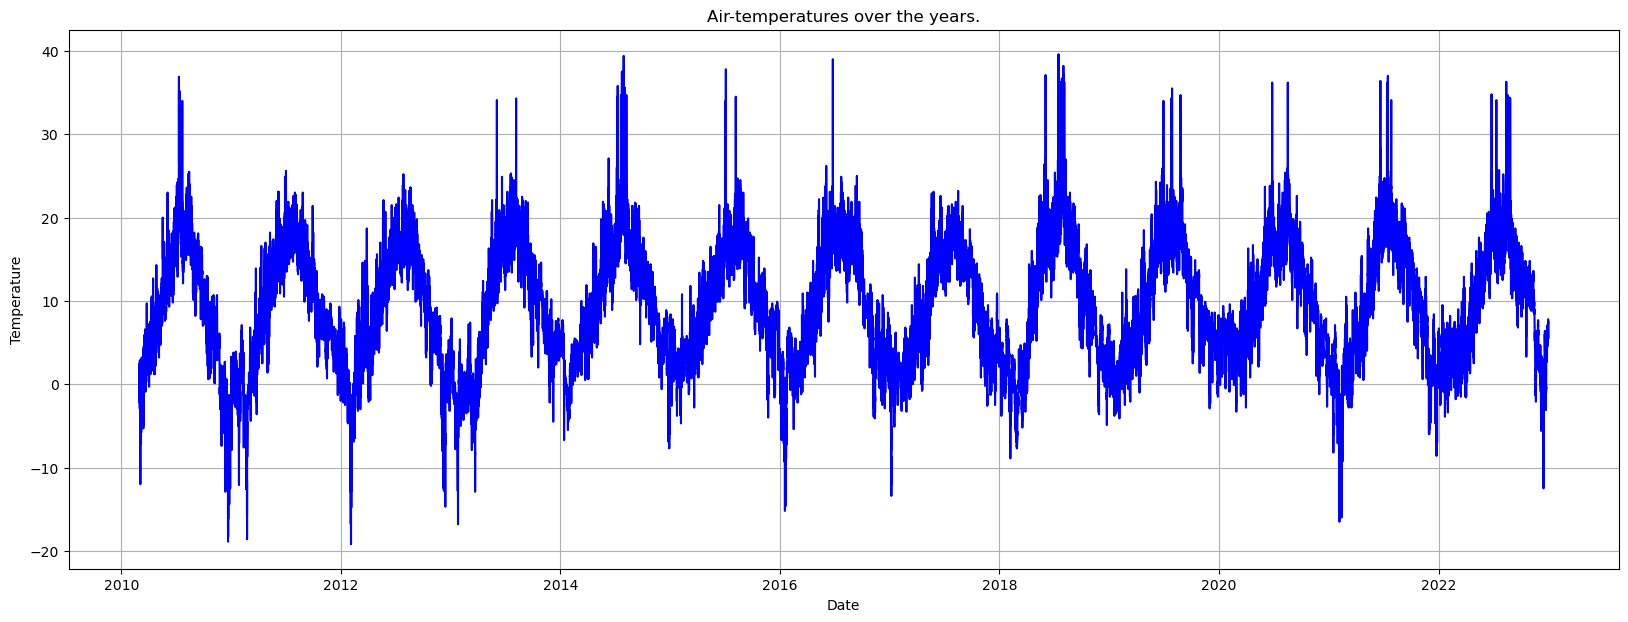

In [96]:
smhidf['Datumtid'] = smhidf['Datum'] + pd.to_timedelta(smhidf['Tid (UTC)'].astype(str)) #Creating a new datatype

fig = mpl.figure(figsize=(20,7)) #Setting a figure and it's dimentions
ax = fig.add_subplot() #Adding a subplot
ax.plot(smhidf["Datumtid"],smhidf["Lufttemperatur"], color="blue") #Plotting datetime on x and temperature on y-axis
ax.set_xlabel("Date") #Set X label
ax.set_ylabel("Temperature") #Set Y Label
ax.grid() #Applying a grid for easier reading.
ax.set_title("Air-temperatures over the years.") #Setting a title

# Q6
### Question:
#### Rank the overall temperature per month, sort from the coldest to the warmest. List the top ten (10) coldest months in the dataset. Format the output as: YEAR/Month: temp, e.g.“2010/January: -5.0”
### Answer:
To be able to get the ten coldest months the data was first grouped by months, this was done using panda’s grouper that can group datetime formats based on months. Then the mean was calculated for each month. Following this the grouped data was sorted in ascending order making the coldest month to come first. Last step was to limit the data to only take the top ten months with head() function.

To be able to print out all the data the months had to be formatted from a numerical value to strings with their respective year. For example, 01 should be reyeard January. This was done by importing python calendar library giving us the option to convert values to years. Then we loop through the top ten list to print.

### Code:

In [97]:
smhi_m = smhidf.groupby(pd.Grouper(key='Datum', axis=0, freq='M')).mean() #Grouping data based on Month
smhi_m = smhi_m.sort_values('Lufttemperatur', ascending=True).head(10).reset_index() #Sorting the data based on Luftemperatur in ascending order, takes out top 10 with head function

for index in range(len(smhi_m)): #Looping through the top 10 list
    print(f'{index+1}. {smhi_m["Datum"][index].year}/{calendar.month_name[smhi_m["Datum"][index].month]}: {smhi_m["Lufttemperatur"][index].round(2)}') #printing out in the right format using python calander.month_year function

1. 2010/December: -3.79
2. 2011/February: -1.52
3. 2012/February: -1.46
4. 2021/February: -0.99
5. 2016/January: -0.92
6. 2018/February: -0.92
7. 2013/March: -0.85
8. 2013/January: -0.65
9. 2012/December: -0.6
10. 2011/January: -0.45


## Q7
### Question:
#### Which distribution is suitable to consider to fit the air temperature data? How well does the data follow that distribution given some measure, e.g.,p-value?
### Answer:
To identify which distribution is suitable for this dataset a histogram is drawn first. This histogram uses all the temperature over the year span from 2011 to 2022. The reason 2010 is removed is because of its incompletes where there a several missing months of data which will negatively affect the distribution over the year. The data is then plotted with a histogram with temperature on the x-axis and the frequency of the different occurring temperature.  

From this histogram it’s visualized two high points which mean that the data can’t be normalized. The reason the data appears the way it does is because of seasons, one summertime and one wintertime. Where under the summertime the data has high temperature over a long period of time and during winter a cold period. To be sure the Shapiro wilk test is calculated and since it's bellow 0.05 the Null hypnotise that the data is normalized must be discouraged.  

To create the most accurate distribution model the Gaussian mixture model is used. This model takes the two highpoints into account and by using two means it can create two normal distribution and then add them together. This is shown by calculating the Chisq_statistic value. The value which is received are higher than the coefficient value 0.05 which mean that it's a good fit.  


### Values
p-value : 7.61017270710331e-24   
chisq_statistic value : 0.0642905059265291  

### Code

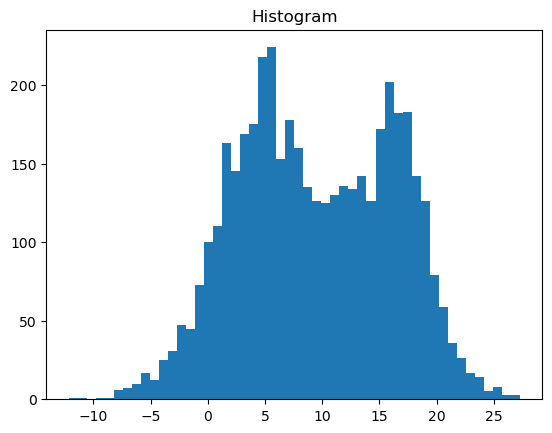

7.61017270710331e-24


In [98]:
x_values = smhidf[(smhidf["Datum"].dt.year != 2010)].groupby("Datum")['Lufttemperatur'].mean() # Grabs all the mean value over a day from the year 2011-2022
mpl.hist(x_values, bins=50) # Creates a histogram with 50 bins or buckets
stat, p = st.shapiro(x_values) # Calculates the p-value for the temperatrue since the p-value is less than 0.05 the data is not normalized and  we have two peaks

# #Add a title and axis labels
mpl.title('Histogram')

mpl.show()
print(p)

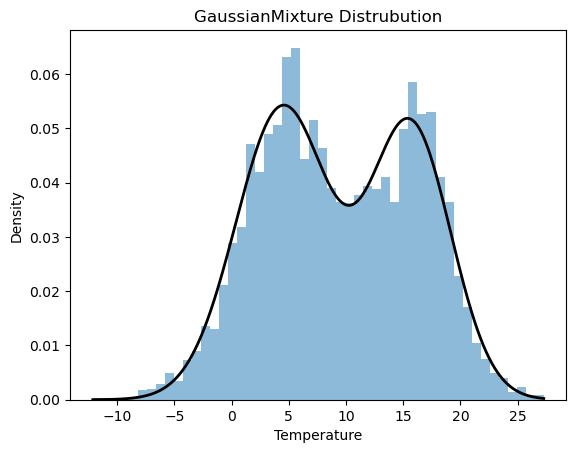

0.0642905059265291


In [99]:
x_values = smhidf[(smhidf["Datum"].dt.year != 2010)].groupby("Datum")['Lufttemperatur'].mean()

x_values = np.array(x_values).reshape(-1, 1) # Creates a matrix of a single data array

gmm = GaussianMixture(n_components=2).fit(x_values) # Fits the models to a gassianMixture with 2 high points

x = np.linspace(x_values.min(), x_values.max(), len(x_values)) # Creates x values range

logprob = gmm.score_samples(x[:, np.newaxis])

pdf = np.exp(logprob)

mpl.hist(x_values, bins=50, density=True, alpha=0.5) # Chose
mpl.plot(x, pdf, '-k', linewidth=2)
mpl.xlabel('Temperature')
mpl.ylabel('Density')
mpl.title('GaussianMixture Distrubution')
mpl.show()

labels = gmm.predict(x_values)

expected = len(x_values) * gmm.weights_
observed = np.bincount(labels, minlength=2)

# calculate chi-squared test statistic
chisq_statistic = np.sum((observed - expected) ** 2 / expected)
print(chisq_statistic)


# Q8
### Question:
#### Do you regard any of the air temperature measures in the dataset to be extreme values/outliers? If so, how many values? Motivate why you consider these values as anomalies.
### Answer:
Getting all outliers could be done in two ways depending on the way the problem is looked at. Either the entire dataset is viewed as one distribution and the outliers are taken by calculating interquartile range and then setting an upper and lower fence and taking it from there. Or, in this case to get more accurate data it was decided to look at each month as their own distribution. This was since 25 degrees in march should absolutely be recognized as an anomaly, but when comparing to the entire data set this would not be detected as an outlier since it’s often 25+ degrees during the summer.

The method chosen was to first group all temperatures by month and year and then calculate individual IRQ (interquartile range) and Upper/Lower fences for each month. Then taking out all the extreme outliers by taking all the temperatures from each month that lays above/below the fences.

The IRQ was calculated by subtracting the first quantile from the third quantile. Fences were calculated by taking the quantile in their respective direction, Q1 for bottom and Q3 for upper. Adding/subtracting 1.5 times the IRQ onto it. This gave the fences desired for outlier detection. 

In total this calculation gave 132 individual readings that were identified as extreme outliers. 


In [100]:
smhidf["Month"] = smhidf["Datum"].dt.month # create new columns for year and month
smhidf["Year"] = smhidf["Datum"].dt.year # create new columns for year and month
grouped_values = smhidf.groupby(["Year", "Month"])["Lufttemperatur"] #group by year and month
Qu1 = grouped_values.quantile(q=0.25) #caluclate quantile 1
Qu3 = grouped_values.quantile(q=0.75) #calculate quantile 3
IRQ = Qu3 - Qu1 # interquartile range
Ufence = Qu3 + 1.5 * IRQ # upper fence
Lfence = Qu1 - 1.5 * IRQ # lower fence

outliers = {} # creating dictionary to store outliers
for name, group in grouped_values:
    month_outliers = (group > Ufence.loc[name]) | (group < Lfence.loc[name]) # get all mothnly outliers for the group
    if month_outliers.any(): # if any outliers
        outliers[name] = group[month_outliers] # add to dictionary
    
# print(outliers)
index_numbers = [] # list of index numbers of
for key, value in outliers.items(): # looping through dictionary
    index_number = value.index[0] # takes the first index number
    index_numbers.append(index_number) # adds to list

smhidf_outliers = smhidf.loc[index_numbers] # select the rows with the index numbers
print(smhidf_outliers)

            Datum Tid (UTC)  Lufttemperatur            Datumtid  Month  Year
102    2010-03-05  05:00:00           -12.0 2010-03-05 05:00:00      3  2010
1317   2010-04-27  11:00:00            14.3 2010-04-27 11:00:00      4  2010
1824   2010-05-18  10:00:00            18.6 2010-05-18 10:00:00      5  2010
2221   2010-06-03  17:00:00            23.0 2010-06-03 17:00:00      6  2010
3132   2010-07-11  09:00:00            34.1 2010-07-11 09:00:00      7  2010
...           ...       ...             ...                 ...    ...   ...
109754 2022-07-12  11:00:00            34.1 2022-07-12 11:00:00      7  2022
110556 2022-08-14  10:00:00            35.8 2022-08-14 10:00:00      8  2022
111485 2022-09-21  04:00:00             7.0 2022-09-21 04:00:00      9  2022
111801 2022-10-04  03:00:00             8.2 2022-10-04 03:00:00     10  2022
113589 2022-12-16  08:00:00           -12.5 2022-12-16 08:00:00     12  2022

[132 rows x 6 columns]


# Q9
### Question:
#### Calculate the mean temperature for each day in the year 2022 and then plot those means using a line plot with dates on the x-axis. Use figsize = (15,8) to specify the size of the plot

### Answer:
The graph bellow shows the temperature change over the year 2022 by using the mean value from all datapoints every day. 
### Code:

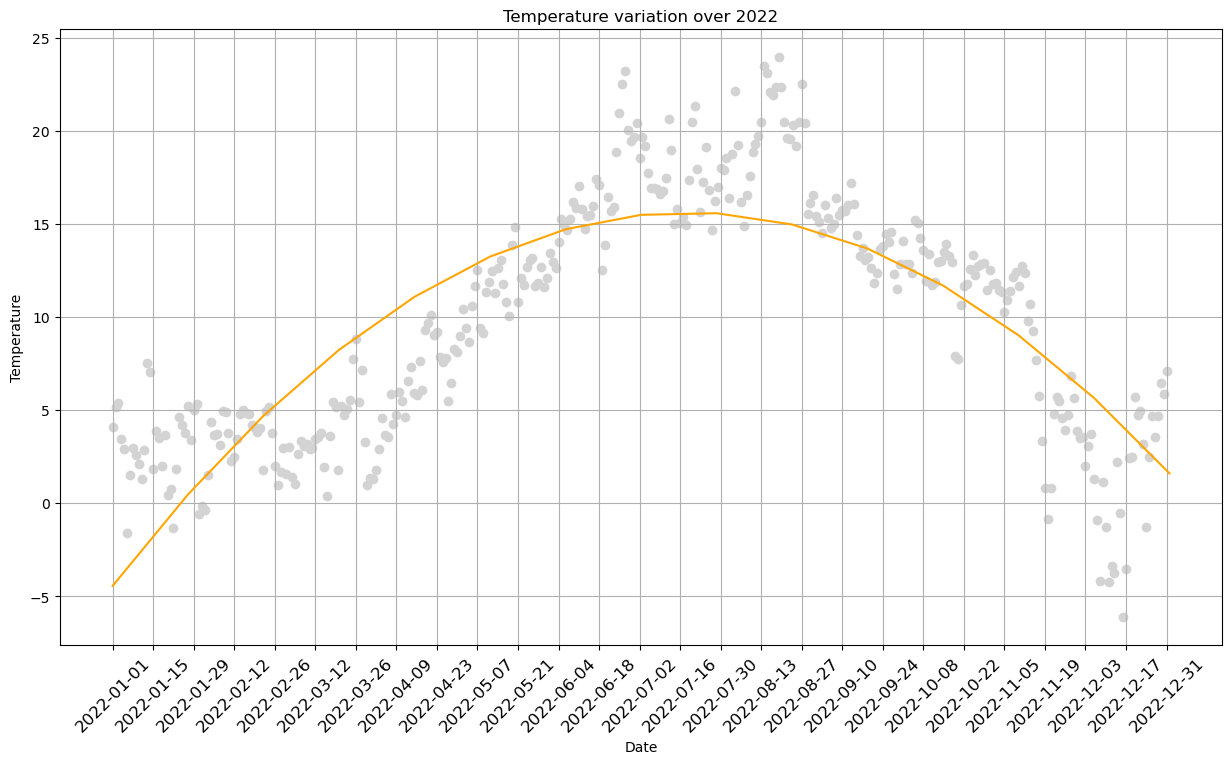

In [101]:
smhidf_2022 = smhidf[(smhidf["Datum"].dt.year == 2022)] # Focusing on the year 2022
temperature = smhidf_2022.groupby("Datum")['Lufttemperatur'].mean() # Calcualtes the mean of 
days = smhidf_2022['Datum'].dt.date.unique() # Picking out all unique dates


x_list = days[::14] # Grabing every 14 date

fig = mpl.figure(figsize=(15,8)) # Seting fig size to 15,8 as 
ax = fig.add_subplot()

data_polreg = np.polyfit(range(len(days)), temperature, 2)
xp = np.linspace(0, len(days), 15)
pr = np.polyval(data_polreg, xp)


ax.grid(True) # Adding grid


ax.set_xticks(range(0, len(days), 14)) # Setting the xticks to every 14th day
ax.set_xticklabels(x_list, rotation=45, fontsize=12) # Setting the xticks to every 14th day

ax.set_xlabel("Date") # Setting the x label
ax.set_ylabel("Temperature") # Setting the y label
ax.set_title("Temperature variation over 2022") # Setting the title


ax.scatter(range(len(days)), temperature, color="lightgrey") # Plotting the scatter plot

ax.plot(xp, pr, color="orange") # Plotting the regression line

mpl.show() # Showing the plot